In [62]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

#For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#for timestamp
from datetime import datetime

#for division
from __future__ import division


In [63]:
#Read CSV file ( File From the Spark Cluster after applying filter for SPY )
df=pd.read_csv('/Users/daya/Desktop/TAQ-Output/trade/trade21.csv',parse_dates=True)
#Filter Trade data to include in trading time (9.30 to 4.00)
df=df[(df['Time'] >= '09:30:00:000000') & (df['Time'] <= '10:00:00:000000')]
df=df[(df['TradePrice']>=195)]
df

,Time,Ticker,Exchange,TradeVolume,TradePrice,Counter
13601,09:30:00:015037,SPY,T,200,201.73,1
13602,09:30:00:015199,SPY,Z,200,201.73,1
13603,09:30:00:015816,SPY,T,200,201.73,1
13604,09:30:00:018530,SPY,Z,100,201.73,1
13605,09:30:00:022311,SPY,T,100,201.73,1
13606,09:30:00:022430,SPY,T,200,201.73,1
13607,09:30:00:023279,SPY,Z,100,201.73,1
13608,09:30:00:023390,SPY,Z,200,201.73,1
13609,09:30:00:023606,SPY,Z,500,201.76,1
13610,09:30:00:023644,SPY,K,90,201.74,1


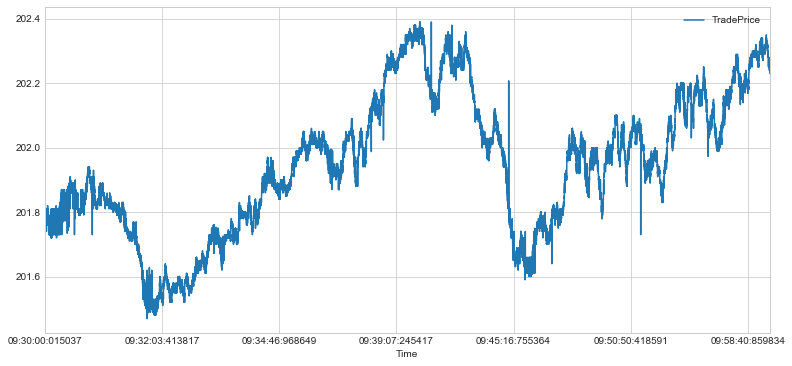

In [64]:

s=df.set_index(['Time'])
s['TradePrice'].plot(figsize=(13,6),legend='True')




In [77]:
#
group1=df['TradeVolume'].groupby(df['Exchange'])
type(group1)


pandas.core.groupby.SeriesGroupBy

In [76]:
s.index

Index(['09:30:00:015037', '09:30:00:015199', '09:30:00:015816',
       '09:30:00:018530', '09:30:00:022311', '09:30:00:022430',
       '09:30:00:023279', '09:30:00:023390', '09:30:00:023606',
       '09:30:00:023644',
       ...
       '09:59:59:648482', '09:59:59:648496', '09:59:59:648511',
       '09:59:59:648526', '09:59:59:648539', '09:59:59:648553',
       '09:59:59:648637', '09:59:59:648886', '09:59:59:648988',
       '09:59:59:649197'],
      dtype='object', name='Time', length=123727)

In [67]:
#List the dominance of Exchages in flat count
group1.count()

Exchange
B     7279
D    17394
J     7871
K    12623
M      491
P    24846
T    26939
X     1199
Y     6863
Z    18222
Name: TradeVolume, dtype: int64

In [78]:
#mean of Volume count

group1.mean()

Exchange
B     122.996016
D     406.061860
J     159.878923
K     198.343500
M    2011.103870
P     351.162803
T     222.452949
X     209.215179
Y     110.197144
Z     238.870376
Name: TradeVolume, dtype: float64

In [ ]:
#